In [5]:
import numpy as np
import pandas as pd
import torch as torch
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
names = open('names.txt', 'r').read().split()

In [3]:
frequencyMatrix = torch.ones((27, 27))
charSet = ['.'] + sorted(list(set(''.join(list(n for n in names)))))

intToChar = {}
charToInt = {}

for index, char in enumerate(charSet):
    intToChar[index] = char
    
for i in intToChar:
    char = intToChar[i]
    charToInt[char] = i

In [4]:
for name in names:
    name = '.' + name + '.'
    
    for charOne, charTwo in zip(name, name[1:]):
        indexOne = charToInt[charOne]
        indexTwo = charToInt[charTwo]
                
        frequencyMatrix[indexOne][indexTwo] += 1

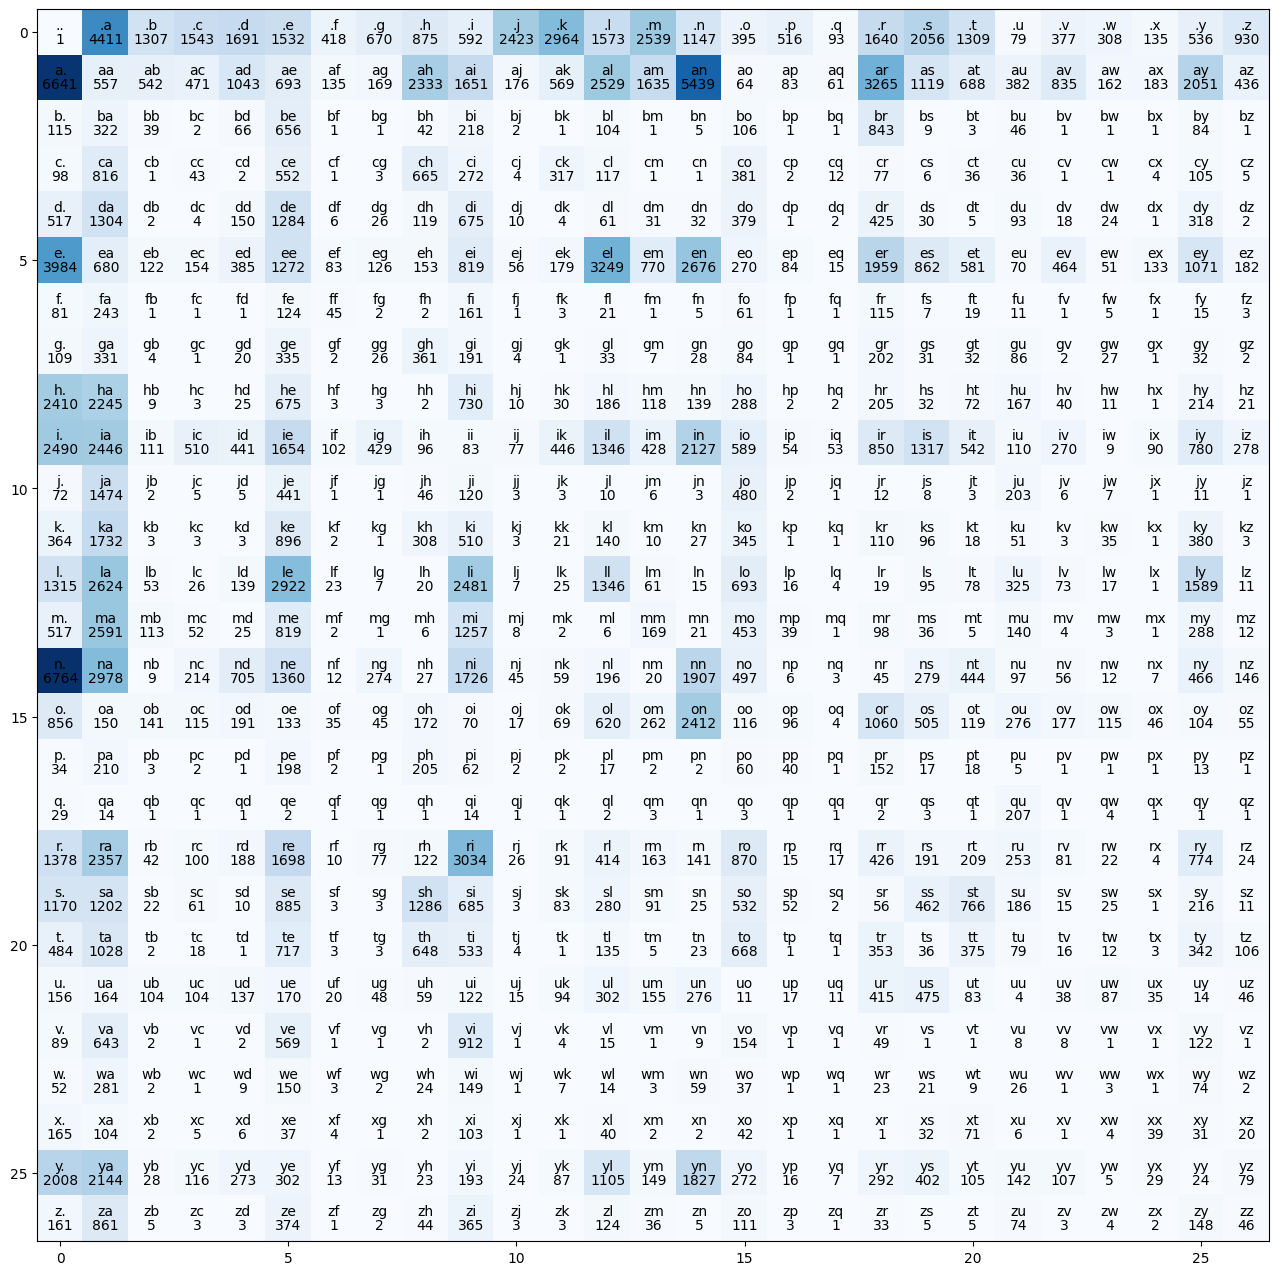

In [5]:
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(frequencyMatrix, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = intToChar[i] + intToChar[j]
        plt.text(j, i, chstr, ha='center', va='bottom')
        plt.text(j, i, int(frequencyMatrix[i][j]), ha='center', va='top')

In [6]:
probabilityDist = torch.tensor(frequencyMatrix / frequencyMatrix.sum(1, keepdim=True))

C:\Users\kylem\AppData\Local\Temp\ipykernel_46012\353627780.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  probabilityDist = torch.tensor(frequencyMatrix / frequencyMatrix.sum(1, keepdim=True))


In [7]:
g = torch.Generator()
g.manual_seed(2147483647)

In [8]:
for i in range(5):
    name = []
    index = 0
    
    while True:
        probability = probabilityDist[index].float()
        index = torch.multinomial(probability, 1, replacement=True, generator=g).item()
        name.append(intToChar[index])
        if index == 0:
            break
    
    print(''.join(name))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [9]:
negLogLikelihood = 0
charPairs = 0

xs, ys = [], []

for name in names:
    name = '.' + name + '.'
    
    for charOne, charTwo in zip(name, name[1:]):
        charPairs += 1
        
        indexOne = charToInt[charOne]
        indexTwo = charToInt[charTwo]
        
        xs.append(indexOne)
        ys.append(indexTwo)
        
        logLikelihood = torch.log(probabilityDist[indexOne, indexTwo])
        negLogLikelihood += logLikelihood

inputs = torch.tensor(xs)
outputs = torch.tensor(ys)

negLogLikelihood = -negLogLikelihood / charPairs
print('negLogLikelihood', negLogLikelihood.item())

negLogLikelihood 2.4543561935424805


In [10]:
layer = torch.randn((27, 27), generator=g, requires_grad=True) # rand numbers sampled from normal distribution 

onehotInputs = torch.nn.functional.one_hot(inputs, num_classes=27).float()
onehotOutputs = torch.nn.functional.one_hot(outputs, num_classes=27).float()

In [11]:
negativeLossLikelihood = 0

for _ in range(100):
    # forward pass
    logits = onehotInputs @ layer
    softmax = logits.exp() / logits.exp().sum(1, keepdim=True)
    
    #predictions = 
    negativeLossLikelihood = -softmax[torch.arange(len(inputs)), outputs].log().mean()
    
    # backward pass
    layer.grad = None
    negativeLossLikelihood.backward()
    
    # update
    layer.data += -50 * layer.grad
    
print(negativeLossLikelihood.item())

2.473310947418213


### Training a trigram model

In [6]:
import numpy as np
import pandas as pd
import torch as torch
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
names = open("names.txt").read().split()

In [8]:
trigrams = np.ones((27, 27, 27))
chars = ['.'] + sorted(list(set(''.join(names))))
charToInt = {char:int for int, char in enumerate(chars)}
intToChar = {int:char for int, char in enumerate(chars)}

In [9]:
for name in names:
    name = '..' + name + '..'
    
    for charOne, charTwo, charThree in zip(name, name[1:], name[2:]):
        indexOne = charToInt[charOne]
        indexTwo = charToInt[charTwo]
        indexThree = charToInt[charThree]
        
        trigrams[indexOne, indexTwo, indexThree] += 1
        

#### Evaluate the loss

In [10]:
trigramDist = trigrams / trigrams.sum(2, keepdims=True)

In [11]:
logLoss = 0
count = 0

xs, ys = [], []

for name in names:
    name = '..' + name + '..'

    for charOne, charTwo, charThree in zip(name, name[1:], name[2:]):
        count += 1
    
        indexOne = charToInt[charOne]
        indexTwo = charToInt[charTwo]
        indexThree = charToInt[charThree]
        
        xs.append([indexOne, indexTwo])
        ys.append(indexThree)
        
        log = np.log(trigramDist[indexOne, indexTwo, indexThree])
        logLoss += log

inputs = torch.tensor(xs)
outputs = torch.tensor(ys)
print(-logLoss / count)

1.942569993621143


In [12]:
g = torch.Generator()
g.manual_seed(2147483647)

In [13]:
for i in range(50):
    name = []
    indexOne, indexTwo = 0, 0
    
    while True:
        probability = torch.tensor(trigramDist[indexOne][indexTwo])
        
        indexOne = indexTwo
        indexTwo = torch.multinomial(probability, 1, replacement=True, generator=g).item()
        
        if (indexTwo == 0):
            break
            
        name.append(intToChar[indexTwo])
        
    
    print(''.join(name))

miq
axx
mereyannyaar
knooraen
el
marviovania
odarimalabelon
hamirelslen
elyn
rae
bra
ceevlainacelonikaireil
bech
amilleia
trutandennimsaby
crewina
lanoxvkyrina
khine
trise
koberseberryslot
ston
absdgcoraf
halinaelilik
khanv
erylo
zaehali
kayzlynnsondret
tasmaanourintin
midanleedes
denia
sabellee
domes
josahli
ezulinl
jasperabri
brea
ppqkgdla
dellucie
ne
sany
nasiah
izalyn
ah
leangsann
boytonik
evedamakore
tryn
can
an
antenceque


In [14]:
onehot_inputs = torch.nn.functional.one_hot(inputs, num_classes=27).float()
onehot_outputs = torch.nn.functional.one_hot(outputs, num_classes=27)

In [15]:
layer = torch.randn((27, 27), generator=g, requires_grad=True)

In [16]:
for _ in range(100):
    # forward pass
    logits = onehot_inputs @ layer
    prediction = logits.exp() / logits.exp().sum(2, keepdims=True)
    
    negativeLoss = -prediction[np.arange(len(inputs)), 1, outputs].log().mean()
    print('loss:', negativeLoss.item())
    
    # backward pass
    layer.grad = None
    negativeLoss.backward()
    
    # update
    layer.data += -0.5 * layer.grad

loss: 3.8389806747436523
loss: 3.8275747299194336
loss: 3.8162143230438232
loss: 3.8049001693725586
loss: 3.7936320304870605
loss: 3.782411575317383
loss: 3.771239757537842
loss: 3.7601165771484375
loss: 3.7490437030792236
loss: 3.7380220890045166
loss: 3.72705340385437
loss: 3.7161378860473633
loss: 3.705278158187866
loss: 3.694474697113037
loss: 3.683729648590088
loss: 3.6730456352233887
loss: 3.6624228954315186
loss: 3.6518640518188477
loss: 3.641371488571167
loss: 3.6309468746185303
loss: 3.6205928325653076
loss: 3.610311508178711
loss: 3.6001052856445312
loss: 3.589977502822876
loss: 3.579930067062378
loss: 3.5699660778045654
loss: 3.5600881576538086
loss: 3.5502994060516357
loss: 3.5406031608581543
loss: 3.5310022830963135
loss: 3.5214991569519043
loss: 3.5120983123779297
loss: 3.5028021335601807
loss: 3.4936139583587646
loss: 3.484537363052368
loss: 3.4755749702453613
loss: 3.4667305946350098
loss: 3.4580070972442627
loss: 3.4494071006774902
loss: 3.440934419631958
loss: 3.43259

In [133]:
print(len(inputs), len(outputs))

260179 260179


In [144]:
outputs[0]

tensor(5)